In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use to display plots in ipython notebook
#%matplotlib inline

## Read in Data
### Path is set so that the csv file is in the same directory as the ipython notebook file

In [2]:
cacao = pd.read_csv('flavors_of_cacao.csv')

In [3]:
cacao.columns = ['Company', 'SpecificOrigin_BarName','REF','ReviewDate','CocoaPerc','CompLoc','Rating','BeanType','BroadBeanOrigin']

In [28]:
cacao.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru


In [29]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company                   1795 non-null object
SpecificOrigin_BarName    1795 non-null object
REF                       1795 non-null int64
ReviewDate                1795 non-null int64
CocoaPerc                 1795 non-null float64
CompLoc                   1795 non-null object
Rating                    1795 non-null float64
BeanType                  907 non-null object
BroadBeanOrigin           1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [6]:
sort_rating = cacao.sort_values(by = 'Rating', ascending = False)
sort_rating.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
78,Amedei,Chuao,111,2007,0.70,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.70,Italy,5.0,Blend,NaN
222,Bonnat,Kaori,1339,2014,0.75,France,4.0,NaN,Brazil
76,Amedei,Porcelana,111,2007,0.70,Italy,4.0,Criollo (Porcelana),Venezuela
1663,Tobago Estate (Pralus),"Roxborough, Tobago",895,2012,0.70,France,4.0,Trinitario,Tobago


In [7]:
sort_percent = cacao.sort_values(by = 'CocoaPerc')
sort_percent.head()

,Company,SpecificOrigin_BarName,REF,ReviewDate,CocoaPerc,CompLoc,Rating,BeanType,BroadBeanOrigin
429,Chokolat Elot (Girard),Guadeloupe,1149,2013,0.42,Martinique,2.75,NaN,Martinique
984,Luker,Selva,552,2010,0.46,Colombia,2.75,NaN,"Colombia, Ecuador"
90,AMMA,"Monte Alegre, 3 diff. plantations",572,2010,0.50,Brazil,3.75,Forastero (Parazinho),Brazil
1423,Santander (Compania Nacional),Colombian Semi Dark,32,2006,0.53,Colombia,2.00,Forastero (Nacional),Colombia
1350,Q Chocolate,Brazil,1069,2013,0.55,Brazil,2.75,NaN,Brazil


## Find the max rating from each company

In [8]:
maxCompRating = cacao.groupby('Company')['Rating'].max()
maxCompRating = maxCompRating.sort_values(ascending = False)
maxCompRating.head()

Company
Amedei      5.0
A. Morin    4.0
Danta       4.0
Durci       4.0
Ritual      4.0
Name: Rating, dtype: float64

(array([  4.,  13.,  32., 141., 259., 644., 602.,  98.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

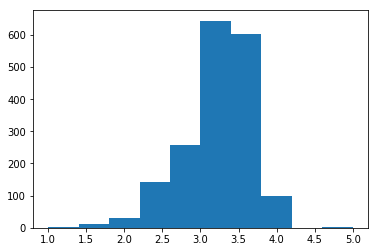

In [9]:
# histograms of ratings
plt.hist(cacao[cacao.columns[6]])


In [10]:
# Count of how many chocolate bars are from each company
company_count = cacao.groupby('Company').Company.count()
company_count = company_count.sort_values(ascending = False)
company_count.head()

Company
Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: Company, dtype: int64

In [11]:
# mean rating for each company
cacao.pivot_table('Rating', columns = 'Company', aggfunc = np.mean)

Company,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,Alexandre,Altus aka Cao Artisan,...,Xocolla,Zak's,Zart Pralinen,Zokoko,Zotter,hello cocoa,hexx,iQ Chocolate,organicfair,twenty-four blackbirds
Rating,3.380435,3.5,3.75,3.25,2.875,3.0,3.083333,2.7,3.5,2.85,...,2.625,3.208333,3.166667,3.55,3.308824,3.125,3.05,2.875,2.85,3.041667


In [12]:
# mean rating from each broad bean origin location
bbo = cacao.groupby('BroadBeanOrigin')['Rating'].mean()
bbo

BroadBeanOrigin
Africa, Carribean, C. Am.       2.750000
Australia                       3.250000
Belize                          3.234694
Bolivia                         3.197368
Brazil                          3.284483
Burma                           3.000000
Cameroon                        3.250000
Carribean                       2.968750
Carribean(DR/Jam/Tri)           3.000000
Central and S. America          3.250000
Colombia                        3.225000
Colombia, Ecuador               2.916667
Congo                           3.325000
Cost Rica, Ven                  2.750000
Costa Rica                      3.144737
Cuba                            3.250000
DR, Ecuador, Peru               3.750000
Dom. Rep., Madagascar           4.000000
Domincan Republic               3.190000
Dominican Rep., Bali            3.750000
Dominican Republic              3.209220
Ecuador                         3.134715
Ecuador, Costa Rica             3.250000
Ecuador, Mad., PNG              3.000000


In [13]:
#subsets into relevant columns
relevant = cacao.iloc[:, [0, 4, 6, 7, 8]]

#gives df with data points that have a Bean Type
with_bt = relevant.dropna(axis=0, subset=["BeanType"])

#gives df with data points that have a BBO
with_bbo = relevant.dropna(axis=0, subset=["BroadBeanOrigin"])

#gives df with data points that have a BBO and a BT
with_both = relevant.dropna(axis=0, how='any')


#add min max columns to the table, maybe averages too?
# add a count of how many bars are in that catagory
##these are 3 seperate tables


#ask professor how to work with words bc the broad bean origin is shaky
## use examples from the babay names lab thing
#get screenshots of the maps from Tableau to put in doument and presentation
#talk to her about how to run a knn when you've only got 2 types of numbers to work with



In [14]:
with_bt.groupby('BroadBeanOrigin')['Rating'].mean()

BroadBeanOrigin
Belize                         3.216667
Bolivia                        3.294118
Brazil                         3.333333
Cameroon                       3.250000
Carribean                      3.250000
Carribean(DR/Jam/Tri)          3.000000
Colombia                       3.125000
Congo                          3.325000
Costa Rica                     3.361111
Cuba                           3.428571
DR, Ecuador, Peru              3.750000
Dom. Rep., Madagascar          4.000000
Domincan Republic              3.500000
Dominican Rep., Bali           3.750000
Dominican Republic             3.302632
Ecuador                        3.035294
Ecuador, Mad., PNG             3.000000
Fiji                           3.125000
Ghana                          3.070312
Ghana & Madagascar             2.000000
Ghana, Panama, Ecuador         3.000000
Gre., PNG, Haw., Haiti, Mad    4.000000
Grenada                        3.088235
Guatemala                      3.464286
Haiti                   

In [15]:
with_bbo

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
0,A. Morin,0.63,3.75,NaN,Sao Tome
1,A. Morin,0.70,2.75,NaN,Togo
2,A. Morin,0.70,3.00,NaN,Togo
3,A. Morin,0.70,3.50,NaN,Togo
4,A. Morin,0.70,3.50,NaN,Peru
5,A. Morin,0.70,2.75,Criollo,Venezuela
6,A. Morin,0.70,3.50,NaN,Cuba
7,A. Morin,0.70,3.50,Criollo,Venezuela
8,A. Morin,0.70,3.75,Criollo,Venezuela
9,A. Morin,0.70,4.00,NaN,Peru


In [32]:
with_both

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
5,A. Morin,0.70,2.75,Criollo,Venezuela
7,A. Morin,0.70,3.50,Criollo,Venezuela
8,A. Morin,0.70,3.75,Criollo,Venezuela
11,A. Morin,0.70,3.00,Criollo,Madagascar
17,A. Morin,0.70,4.00,Trinitario,Venezuela
24,Acalli,0.70,3.75,Criollo,Peru
25,Adi,0.60,2.75,Trinitario,Fiji
26,Adi,0.80,3.25,Trinitario,Fiji
27,Adi,0.88,3.50,Trinitario,Fiji
28,Adi,0.72,3.50,Trinitario,Fiji


In [71]:
uniqueBean = with_bt.BeanType.unique()
uniqueBean

array(['Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [73]:
#grabs all the bars that have the criollo bean in their mix
mask1 = np.array(['criollo' in x.lower() for x in uniqueBean])
all_Crio = uniqueBean[mask1]
all_Crio

array(['Criollo', 'Criollo, Trinitario', 'Criollo (Porcelana)',
       'Trinitario (85% Criollo)', 'Trinitario, Criollo',
       'Criollo (Ocumare)', 'Criollo (Ocumare 61)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare 67)', 'Criollo (Wild)',
       'Criollo, +', 'Blend-Forastero,Criollo', 'Criollo, Forastero',
       'Criollo (Amarru)'], dtype=object)

In [92]:
#grabs all the bars that have the trinitario bean in their mix
mask2 = np.array(['trinitario' in x.lower() for x in uniqueBean])
all_Trini = uniqueBean[mask2]
all_Trini

array(['Trinitario', 'Criollo, Trinitario', 'Trinitario (85% Criollo)',
       'Trinitario, Criollo', 'Trinitario, Forastero',
       'Trinitario (Scavina)', 'Forastero, Trinitario',
       'Trinitario, Nacional', 'Trinitario (Amelonado)',
       'Trinitario, TCGA'], dtype=object)

In [93]:
#grabs all the bars that have the forastero bean in their mix
mask3 = np.array(['forastero' in x.lower() for x in uniqueBean])
all_Fora = uniqueBean[mask3]
all_Fora

array(['Forastero (Arriba)', 'Forastero', 'Forastero (Nacional)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS',
       'Blend-Forastero,Criollo', 'Criollo, Forastero',
       'Forastero(Arriba, CCN)', 'Forastero (Arriba) ASSS',
       'Forastero, Trinitario', 'Forastero (Amelonado)'], dtype=object)

In [95]:
#filter data to get selected beans
crioFilter = with_bt[with_bt.BeanType.isin(all_Crio)]
crioFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
5,A. Morin,0.7,2.75,Criollo,Venezuela
7,A. Morin,0.7,3.50,Criollo,Venezuela
8,A. Morin,0.7,3.75,Criollo,Venezuela
11,A. Morin,0.7,3.00,Criollo,Madagascar
24,Acalli,0.7,3.75,Criollo,Peru


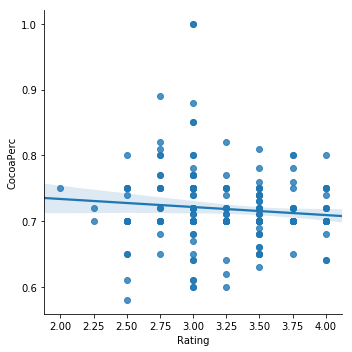

In [96]:
#plot the cocoa percentage vs rating in scatter plot
fig1 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = crioFilter)

In [87]:
#filter data to get selected beans
triniFilter = with_bt[with_bt.BeanType.isin(all_Trini)]
triniFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
17,A. Morin,0.70,4.00,Trinitario,Venezuela
25,Adi,0.60,2.75,Trinitario,Fiji
26,Adi,0.80,3.25,Trinitario,Fiji
27,Adi,0.88,3.50,Trinitario,Fiji
28,Adi,0.72,3.50,Trinitario,Fiji


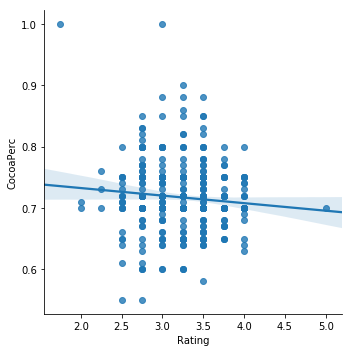

In [97]:
#plot the cocoa percentage vs rating in scatter plot
fig2 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = triniFilter)

In [89]:
#filter data to get selected beans
foraFilter = with_bt[with_bt.BeanType.isin(all_Fora)]
foraFilter.head()

,Company,CocoaPerc,Rating,BeanType,BroadBeanOrigin
29,Aequare (Gianduja),0.55,2.75,Forastero (Arriba),Ecuador
30,Aequare (Gianduja),0.70,3.00,Forastero (Arriba),Ecuador
34,Akesson's (Pralus),0.75,2.75,Forastero,Brazil
40,Alexandre,0.70,3.50,Forastero (Nacional),Ecuador
43,Alexandre,0.70,3.50,Forastero,Tanzania


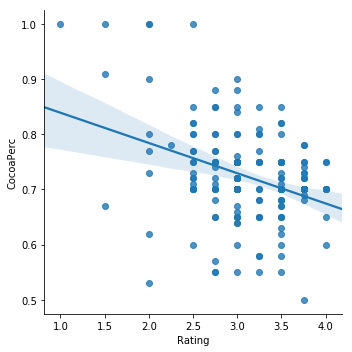

In [98]:
#plot the cocoa percentage vs rating in scatter plot
fig3 = sns.lmplot(x= 'Rating', y = 'CocoaPerc', data = foraFilter)

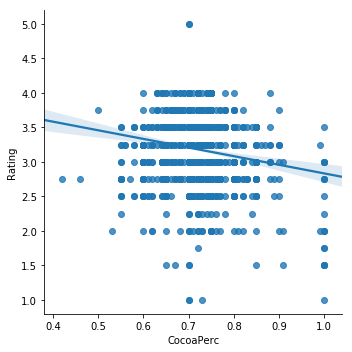

In [52]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = cacao)

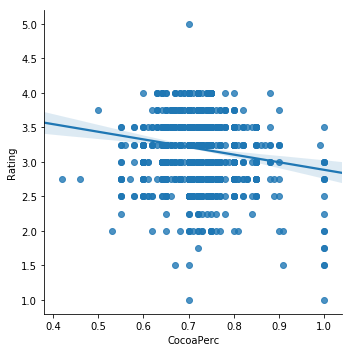

In [24]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = with_bbo)

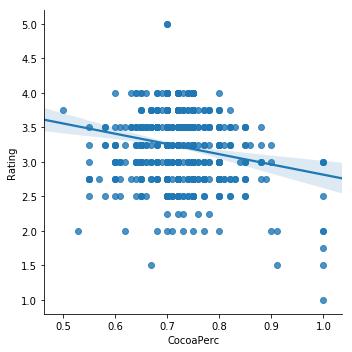

In [25]:
fig = sns.lmplot(x= 'CocoaPerc', y = 'Rating', data = with_bt)

In [ ]:
tips = sns.load_dataset('tips')

fig = sns.pairplot(tips)  # one drwaback is that thereis redundant information

pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)